# CNN

In [1]:
import pandas as pd
import cv2
import numpy as np
import glob, os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Input
from keras.utils import plot_model
import matplotlib.pyplot as plt

import warnings
#warnings.simplefilter("ignore")

Using TensorFlow backend.


In [2]:
data = pd.read_csv('results_final.csv')

data.head()

,Path,Actual word,Kernel size,Kernel type,Iterations,Original,Opening,Closing,Erosion,Dilation,OC,CO,OCO,COC,Sharpened
0,0.jpeg,BE,2,0,1,BE,BE,BE,RE,NaN,RF,RFE,NaN,NaN,BE
1,1.jpeg,the,2,0,1,NaN,the,the,NaN,the,the,the,the,the,the
2,10.png,hours),2,0,1,NaN,NaN,NaN,hours),NaN,NaN,NaN,hours),hours),hours)
3,100.png,mean,2,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000.png,(ii),2,0,1,NaN,NaN,NaN,NaN,NaN,(ii),(ii),NaN,NaN,NaN


In [3]:
np.count_nonzero(np.where(data['Actual word'] == data['Original'], True, False))

17652

In [4]:
headers = ["Original","Opening", "Closing", "Erosion", "Dilation", "OC", "CO","OCO", "COC", "Sharpened"]
rows = [["kernel_size", "kernel_type",'Operation', 'Count']]
for kernel_size in range(2,4):
    for kernel_type in range(2):
        data_filtered = data[(data['Kernel size']== kernel_size) & (data['Kernel type'] == kernel_type)]
        for header in headers:
            rows.append([kernel_size, kernel_type, header,
            np.count_nonzero(np.where(data_filtered['Actual word'] == data_filtered[header], True, False))])

df = pd.DataFrame(data=rows[1:], columns=rows[0])

df_v2 = df[df['Operation'] != 'Original']
df_v2

df_v2.groupby(['kernel_type', 'kernel_size']).mean()

Count
kernel_type kernel_size             
0           2            4387.000000
            3            4018.444444
1           2            4511.666667
            3            4072.333333

In [5]:
columns = ["Original", "Opening", "Closing", "Erosion", "Dilation", "OC", "CO","OCO", "COC", 'Sharpened']

for col in columns:
    data[col + '?'] = np.where(data['Actual word'] == data[col], True, False)

for kernel_size in range(2,4):
    for kernel_type in range(2):
        data_filtered = data[(data['Kernel size']== kernel_size) & (data['Kernel type'] == kernel_type)]
        print (kernel_size, kernel_type)
        for col in columns:
            print (col,end=' ')
            print (np.count_nonzero(data_filtered[~data_filtered['Original?']][col + '?']))


2 0
Original 0
Opening 666
Closing 666
Erosion 349
Dilation 635
OC 963
CO 975
OCO 990
COC 993
Sharpened 343
2 1
Original 0
Opening 666
Closing 640
Erosion 349
Dilation 592
OC 989
CO 995
OCO 1081
COC 1047
Sharpened 343
3 0
Original 0
Opening 244
Closing 313
Erosion 451
Dilation 779
OC 365
CO 327
OCO 367
COC 343
Sharpened 710
3 1
Original 0
Opening 142
Closing 223
Erosion 481
Dilation 663
OC 244
CO 235
OCO 247
COC 236
Sharpened 710


In [6]:


data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 0) & ~data['Original?']]

d1 = data_filtered[data_filtered['Closing?']]


data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1) & ~data['Original?']]
d2 = data_filtered[data_filtered['Closing?']]


d2 = d2['Actual word'].to_numpy() 
d1 = d1['Actual word'].to_numpy() 

print (d2.size)
print (d1.size)

temp = [x for x in d2 if x not in d1]

print (temp)
print ('second')
temp = [x for x in d1 if x not in d2]

print (temp) 

# d2['Actual word'].to_numpy()

640
666
['AHEAD', '(iv)', 'Court', 'exporters.', '"be', 'business', 'reproachfully', 'Ewell/', 'was', 'minimum', 'appointed', 'economic', 'we', 'CABINET', 'house', 'hour', 'BEFORE', '"to', 'kirana', 'still &', 'salute', 'IN', 'paid', 'classification', 'Five', 'landscaping+', 'we', '5965-12.', 'India,', 'us', 'business', 'just@', 'around', 'Research', 'was', 'told:', 'BEFORE', 'MUCH', 'anxious', 'studied', 'services.', 'would*', 'Human', 'cost/kg', 'Pizza', 'LUI', 'Excise', '[ when', 'At', 'everthing', 'pangs', 'should', 'MORE', 'needs', 'than', 'would', 'flashPrince', '" goodbye', 'Miss/', 'was', 'controls', 'Securitisation', 'PRIVATE', 'recovered', 'king', 'silence', 'reading.', '" people', 'DREW', 'clarity']
second
['theory.', 'ends', 'maintain', 'ever', 'Lion', 'country', 'were', 'where', 'sure', 'loans.', 'which', 'challenge.', 'incentives', 'detail', 'your', 'later', 'grove', 'chairman=', 'Hours)', 'factors', 'internal', 'FEW', 'carefully', 'Aunt', 'down', 'BELIEVE', 'Strategist',

In [7]:
for col in columns:
    data['Class'] = np.where(data['Original?'], 'No filter', '')
data

,Path,Actual word,Kernel size,Kernel type,Iterations,Original,Opening,Closing,Erosion,Dilation,...,Opening?,Closing?,Erosion?,Dilation?,OC?,CO?,OCO?,COC?,Sharpened?,Class
0,0.jpeg,BE,2,0,1,BE,BE,BE,RE,NaN,...,True,True,False,False,False,False,False,False,True,No filter
1,1.jpeg,the,2,0,1,NaN,the,the,NaN,the,...,True,True,False,True,True,True,True,True,True,
2,10.png,hours),2,0,1,NaN,NaN,NaN,hours),NaN,...,False,False,True,False,False,False,True,True,True,
3,100.png,mean,2,0,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,
4,1000.png,(ii),2,0,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,True,False,False,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9995.jpeg,exactly,3,1,1,exactly,exactly,exactly,exactly,exactly,...,True,True,True,True,True,True,True,True,False,No filter
39996,9996.png,Explain,3,1,1,Explain,Explain,Explain,Explain,Explain,...,True,True,True,True,True,True,True,True,False,No filter
39997,9997.jpeg,COULD,3,1,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,
39998,9998.jpeg,NO,3,1,1,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,


In [8]:
for i in data.index:
    if not data.at[i,'Original?']:
        classes = []
        if data.at[i,'Opening?'] : classes.append('O')
        if data.at[i,'Closing?'] : classes.append('C')
        if data.at[i,'Erosion?'] : classes.append('E')
        if data.at[i,'Dilation?'] : classes.append('D')
        if data.at[i,'OC?'] : classes.append('OC')
        if data.at[i,'CO?'] : classes.append('CO')
        if data.at[i,'OCO?'] : classes.append('OCO')
        if data.at[i,'COC?'] : classes.append('COC')
        if data.at[i,'Sharpened?'] : classes.append('S')
        data.at[i,'Class'] = classes
#         print classes
        
# data['Class']


In [9]:
data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1) & ~data['Original?']]
data_filtered.Class.map(tuple).nunique()
#nunique
#value_counts


175

In [10]:
image_files = [f for f in sorted(glob.glob("dataset/dataset/v011_words_small/*.*"))]
image_files

['dataset/dataset/v011_words_small/0.jpeg',
 'dataset/dataset/v011_words_small/1.jpeg',
 'dataset/dataset/v011_words_small/10.png',
 'dataset/dataset/v011_words_small/100.png',
 'dataset/dataset/v011_words_small/1000.png',
 'dataset/dataset/v011_words_small/1001.png',
 'dataset/dataset/v011_words_small/1002.png',
 'dataset/dataset/v011_words_small/1003.png',
 'dataset/dataset/v011_words_small/1004.jpeg',
 'dataset/dataset/v011_words_small/1005.jpeg',
 'dataset/dataset/v011_words_small/1006.png',
 'dataset/dataset/v011_words_small/1007.png',
 'dataset/dataset/v011_words_small/1008.jpeg',
 'dataset/dataset/v011_words_small/1009.png',
 'dataset/dataset/v011_words_small/101.png',
 'dataset/dataset/v011_words_small/1010.png',
 'dataset/dataset/v011_words_small/1011.png',
 'dataset/dataset/v011_words_small/1012.jpeg',
 'dataset/dataset/v011_words_small/1013.png',
 'dataset/dataset/v011_words_small/1014.jpeg',
 'dataset/dataset/v011_words_small/1015.png',
 'dataset/dataset/v011_words_small/10

In [11]:
total = len(image_files)
image_dims = np.array([np.array(Image.open(fname).size) for fname in image_files])

avg_dim = np.array(np.mean(image_dims, axis=(0)), dtype=np.uint8)

images = [Image.open(fname).resize(avg_dim, Image.ANTIALIAS) for fname in image_files]


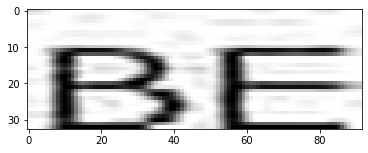

In [12]:
plt.imshow(images[0])

In [13]:
X = np.array([np.array(fname) for fname in images])
X = X / 255.0
X.shape

(10000, 33, 92, 3)

In [14]:
data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1)]
Y = data_filtered.Class.to_numpy()


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


Y = [",".join(map(str,y)) if type(y) is list else y for y in Y]

# onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
# feature = onehot_encoder.fit_transform(Y)

le = LabelEncoder()
Y = le.fit_transform(Y)

# le.inverse_transform(Y)

np.unique(Y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(33, 92, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(176, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [18]:
# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 31, 90, 8)         224       
_________________________________________________________________
average_pooling2d_1 (Average (None, 15, 45, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 43, 16)        1168      
_________________________________________________________________
average_pooling2d_2 (Average (None, 6, 21, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               201700    
_________________________________________________________________
dense_2 (Dense)              (None, 80)               

In [19]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2) 


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 9s 1ms/step - loss: 1.7340 - accuracy: 0.5680 - val_loss: 1.4577 - val_accuracy: 0.6731
Epoch 2/30
6400/6400 [==============================] - 8s 1ms/step - loss: 1.3865 - accuracy: 0.6822 - val_loss: 1.3579 - val_accuracy: 0.6994
Epoch 3/30
6400/6400 [==============================] - 13s 2ms/step - loss: 1.3274 - accuracy: 0.6920 - val_loss: 1.3393 - val_accuracy: 0.7125
Epoch 4/30
6400/6400 [==============================] - 8s 1ms/step - loss: 1.2643 - accuracy: 0.7052 - val_loss: 1.3275 - val_accuracy: 0.7131
Epoch 5/30
6400/6400 [==============================] - 8s 1ms/step - loss: 1.2192 - accuracy: 0.7202 - val_loss: 1.3058 - val_accuracy: 0.7181
Epoch 6/30
6400/6400 [==============================] - 13s 2ms/step - loss: 1.1792 - accuracy: 0.7222 - val_loss: 1.3145 - val_accuracy: 0.7219
Epoch 7/30
6400/6400 [==============================] - 8s 1ms/step - loss: 1.1187 - 

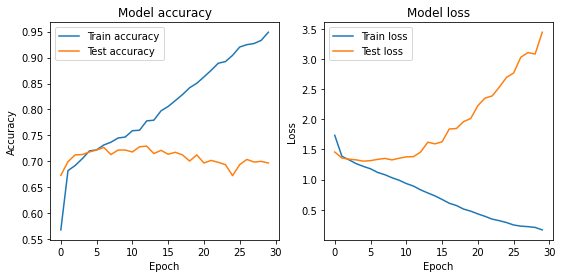

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [21]:
# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 3.490835180282593
Test accuracy: 70.70%


# Choose one class by random choice

In [22]:
import random

# for col in columns:
data['OneClass'] = np.where(data['Original?'], 'No filter', '')
        

for i in data.index:
    if not data.at[i,'Original?']:
        classes = []
        if data.at[i,'Opening?'] : classes.append('O')
        if data.at[i,'Closing?'] : classes.append('C')
        if data.at[i,'Erosion?'] : classes.append('E')
        if data.at[i,'Dilation?'] : classes.append('D')
        if data.at[i,'OC?'] : classes.append('OC')
        if data.at[i,'CO?'] : classes.append('CO')
        if data.at[i,'OCO?'] : classes.append('OCO')
        if data.at[i,'COC?'] : classes.append('COC')
        if data.at[i,'Sharpened?'] : classes.append('S')
        if classes :
            r = random.choice(classes)
            data.at[i,'OneClass'] = r

data['OneClass']


0        No filter
1                D
2                S
3                 
4               CO
           ...    
39995    No filter
39996    No filter
39997             
39998             
39999    No filter
Name: OneClass, Length: 40000, dtype: object

In [23]:
data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1) & ~data['Original?']]


data_filtered.OneClass.map(tuple).nunique()

10

In [24]:
data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1)]
Y = data_filtered.OneClass.to_numpy()
Y

array(['No filter', 'S', 'E', ..., '', 'COC', 'No filter'], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Y = [",".join(map(str,y)) if type(y) is list else y for y in Y]
le = LabelEncoder()
Y = le.fit_transform(Y)

# le.inverse_transform(Y)

np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(33, 92, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [28]:
# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 31, 90, 8)         224       
_________________________________________________________________
average_pooling2d_3 (Average (None, 15, 45, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 43, 16)        1168      
_________________________________________________________________
average_pooling2d_4 (Average (None, 6, 21, 16)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               201700    
_________________________________________________________________
dense_5 (Dense)              (None, 80)               

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2) 

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 5s 771us/step - loss: 1.2687 - accuracy: 0.6169 - val_loss: 1.1684 - val_accuracy: 0.6744
Epoch 2/30
6400/6400 [==============================] - 5s 743us/step - loss: 1.1218 - accuracy: 0.6873 - val_loss: 1.1332 - val_accuracy: 0.6963
Epoch 3/30
6400/6400 [==============================] - 5s 784us/step - loss: 1.0858 - accuracy: 0.7003 - val_loss: 1.1516 - val_accuracy: 0.6825
Epoch 4/30
6400/6400 [==============================] - 6s 980us/step - loss: 1.0486 - accuracy: 0.7077 - val_loss: 1.1431 - val_accuracy: 0.6950
Epoch 5/30
6400/6400 [==============================] - 7s 1ms/step - loss: 1.0125 - accuracy: 0.7183 - val_loss: 1.0889 - val_accuracy: 0.7031
Epoch 6/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.9839 - accuracy: 0.7212 - val_loss: 1.0773 - val_accuracy: 0.7056
Epoch 7/30
6400/6400 [==============================] - 7s 1ms/step - loss: 0.94

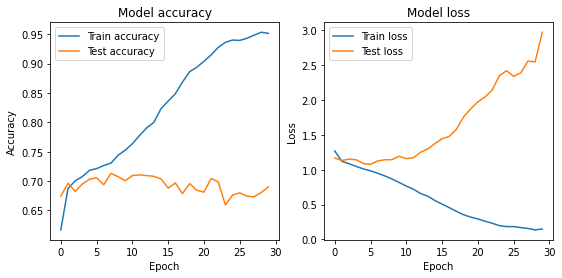

In [30]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [31]:
# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 2.8474336957931516
Test accuracy: 67.70%


# Model Improvement


Appraoches:
1. Dropout
2. Early stop
3. Reduce image dimensions


## List classes

In [32]:
data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1)]
Y = data_filtered.Class.to_numpy()

Y = [",".join(map(str,y)) if type(y) is list else y for y in Y]

le = LabelEncoder()
Y = le.fit_transform(Y)

np.unique(Y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175])

In [33]:
from keras.layers import Dropout
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(33, 92, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(176, activation='softmax'))


In [34]:
# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 31, 90, 8)         224       
_________________________________________________________________
average_pooling2d_5 (Average (None, 15, 45, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 43, 16)        1168      
_________________________________________________________________
average_pooling2d_6 (Average (None, 6, 21, 16)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2016)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               201700    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2) 

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 5s 823us/step - loss: 1.9366 - accuracy: 0.5384 - val_loss: 1.3437 - val_accuracy: 0.7038
Epoch 2/30
6400/6400 [==============================] - 5s 789us/step - loss: 1.5182 - accuracy: 0.6620 - val_loss: 1.2930 - val_accuracy: 0.7212
Epoch 3/30
6400/6400 [==============================] - 5s 838us/step - loss: 1.4378 - accuracy: 0.6812 - val_loss: 1.2567 - val_accuracy: 0.7262
Epoch 4/30
6400/6400 [==============================] - 6s 936us/step - loss: 1.3902 - accuracy: 0.6861 - val_loss: 1.3199 - val_accuracy: 0.7300
Epoch 5/30
6400/6400 [==============================] - 5s 774us/step - loss: 1.3489 - accuracy: 0.7006 - val_loss: 1.2110 - val_accuracy: 0.7406
Epoch 6/30
6400/6400 [==============================] - 5s 782us/step - loss: 1.2937 - accuracy: 0.7091 - val_loss: 1.1960 - val_accuracy: 0.7406
Epoch 7/30
6400/6400 [==============================] - 5s 772us/step - loss

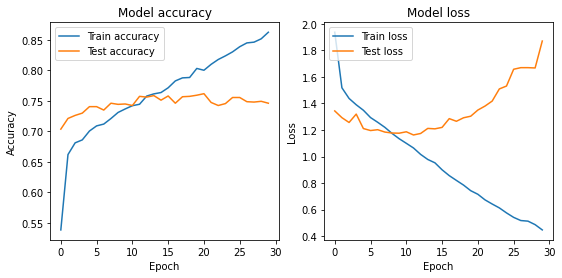

In [37]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [38]:
# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 2.337554102897644
Test accuracy: 74.55%


## Single class randomly chosen

In [52]:
data_filtered = data[(data['Kernel size']== 2) & (data['Kernel type'] == 1)]
Y = data_filtered.OneClass.to_numpy()

Y = [",".join(map(str,y)) if type(y) is list else y for y in Y]
le = LabelEncoder()
Y = le.fit_transform(Y)

np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [65]:
from keras.layers import Dropout
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(33, 92, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.2))

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11, activation='softmax'))


In [66]:
# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 31, 90, 8)         224       
_________________________________________________________________
average_pooling2d_17 (Averag (None, 15, 45, 8)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 15, 45, 8)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 43, 16)        1168      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 6, 21, 16)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 6, 21, 16)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2016)             

In [67]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2) 

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 6s 874us/step - loss: 1.3458 - accuracy: 0.5691 - val_loss: 1.3124 - val_accuracy: 0.6369
Epoch 2/30
6400/6400 [==============================] - 5s 807us/step - loss: 1.1793 - accuracy: 0.6750 - val_loss: 1.2321 - val_accuracy: 0.6619
Epoch 3/30
6400/6400 [==============================] - 5s 815us/step - loss: 1.1273 - accuracy: 0.6911 - val_loss: 1.1930 - val_accuracy: 0.6712
Epoch 4/30
6400/6400 [==============================] - 5s 834us/step - loss: 1.0917 - accuracy: 0.6994 - val_loss: 1.1713 - val_accuracy: 0.6744
Epoch 5/30
6400/6400 [==============================] - 5s 848us/step - loss: 1.0739 - accuracy: 0.7078 - val_loss: 1.1730 - val_accuracy: 0.6806
Epoch 6/30
6400/6400 [==============================] - 5s 851us/step - loss: 1.0429 - accuracy: 0.7105 - val_loss: 1.1574 - val_accuracy: 0.6819
Epoch 7/30
6400/6400 [==============================] - 5s 857us/step - loss

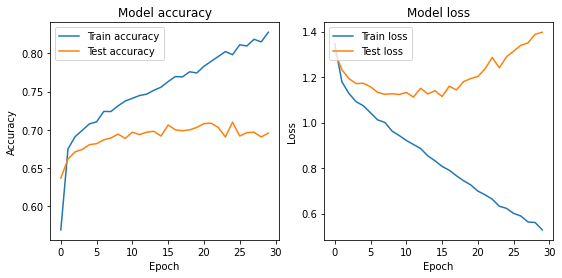

In [68]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

In [70]:
# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

Test loss: 1.3452757778167725
Test accuracy: 70.45%


## CNN 3 layers

In [73]:
from keras.layers import Dropout
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(33, 92, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.2))

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11, activation='softmax'))

# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
model.summary()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 31, 90, 8)         224       
_________________________________________________________________
average_pooling2d_25 (Averag (None, 15, 45, 8)         0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 15, 45, 8)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 43, 16)        1168      
_________________________________________________________________
average_pooling2d_26 (Averag (None, 6, 21, 16)         0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 6, 21, 16)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 4, 19, 32)       

In [74]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2) 

Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 6s 910us/step - loss: 1.4302 - accuracy: 0.5048 - val_loss: 1.4039 - val_accuracy: 0.5556
Epoch 2/30
6400/6400 [==============================] - 6s 903us/step - loss: 1.2587 - accuracy: 0.6289 - val_loss: 1.2716 - val_accuracy: 0.6388
Epoch 3/30
6400/6400 [==============================] - 10s 2ms/step - loss: 1.2110 - accuracy: 0.6491 - val_loss: 1.2526 - val_accuracy: 0.6612
Epoch 4/30
6400/6400 [==============================] - 5s 856us/step - loss: 1.1615 - accuracy: 0.6786 - val_loss: 1.2210 - val_accuracy: 0.6725
Epoch 5/30
6400/6400 [==============================] - 6s 889us/step - loss: 1.1392 - accuracy: 0.6839 - val_loss: 1.2067 - val_accuracy: 0.6750
Epoch 6/30
6400/6400 [==============================] - 6s 969us/step - loss: 1.1242 - accuracy: 0.6944 - val_loss: 1.2388 - val_accuracy: 0.6419
Epoch 7/30
6400/6400 [==============================] - 6s 917us/step - loss:

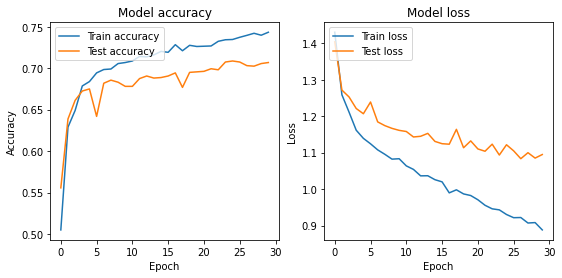

Test loss: 1.0444603929519654
Test accuracy: 72.00%


In [75]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))

## CNN 4 layers

In [79]:
from keras.layers import Dropout
# Define the model
model = Sequential()

# The first convolutional layer
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(33, 92, 3), activation='relu'))        
model.add(AveragePooling2D(pool_size=(2,2))) 
model.add(Dropout(0.2))

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# The third convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# The fourth convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten()),
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(11, activation='softmax'))

# Before training a model, you need to configure the learning process with compile() function
model.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
model.summary()


ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv2d_43/convolution' (op: 'Conv2D') with input shapes: [?,2,9,16], [3,3,16,32].

In [83]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization


cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(33, 92, 3)))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(11, activation='softmax'))

# cnn4.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(),
#               metrics=['accuracy'])

# Before training a model, you need to configure the learning process with compile() function
cnn4.compile(optimizer='adam', # The optimisation method
              loss='sparse_categorical_crossentropy', # Loss function. Sparse categorical crossentropy can be used if the targets are numbers
              metrics=['accuracy']) # Used to monitor the training and testing steps. It uses accuracy, the fraction of the images that are correctly classified
cnn4.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 31, 90, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 90, 32)        128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 29, 88, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 29, 88, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 44, 32)        0         
_________________________________________________________________
dropout_54 (Dropout)         (None, 14, 44, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 12, 42, 64)      

In [84]:
history = cnn4.fit(X_train, y_train, epochs=30, validation_split=0.2) 


Train on 6400 samples, validate on 1600 samples
Epoch 1/30
6400/6400 [==============================] - 87s 14ms/step - loss: 1.9018 - accuracy: 0.5492 - val_loss: 1.4157 - val_accuracy: 0.6237
Epoch 2/30
6400/6400 [==============================] - 81s 13ms/step - loss: 1.3798 - accuracy: 0.6744 - val_loss: 1.2638 - val_accuracy: 0.6513
Epoch 3/30
6400/6400 [==============================] - 79s 12ms/step - loss: 1.2054 - accuracy: 0.6897 - val_loss: 1.2591 - val_accuracy: 0.6662
Epoch 4/30
6400/6400 [==============================] - 81s 13ms/step - loss: 1.1141 - accuracy: 0.7063 - val_loss: 1.2845 - val_accuracy: 0.6769
Epoch 5/30
6400/6400 [==============================] - 77s 12ms/step - loss: 1.0566 - accuracy: 0.7122 - val_loss: 1.3081 - val_accuracy: 0.6381
Epoch 6/30
6400/6400 [==============================] - 77s 12ms/step - loss: 1.0325 - accuracy: 0.7148 - val_loss: 1.2834 - val_accuracy: 0.6419
Epoch 7/30
6400/6400 [==============================] - 78s 12ms/step - loss

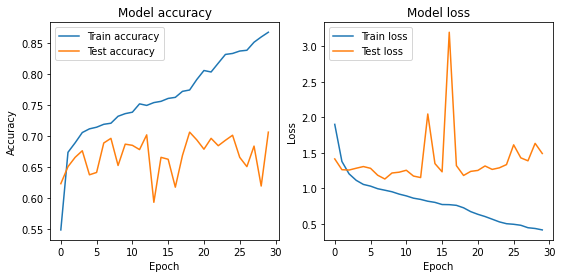

Test loss: 1.4701155996322632
Test accuracy: 70.15%


In [85]:
# Plot training & validation accuracy values
plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper left')
plt.show()

# Evaluate the model
# Returns the loss value & metrics values for the model in test mode
loss, acc = cnn4.evaluate(X_test, y_test, verbose=0)

print('Test loss: {}'.format(loss))
print('Test accuracy: {:.2%}'.format(acc))